In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

sys.path.insert(0, '../src')
from logistic_regression import LogisticRegression
from plotters import plot_loss, plot_image

np.random.seed(43)

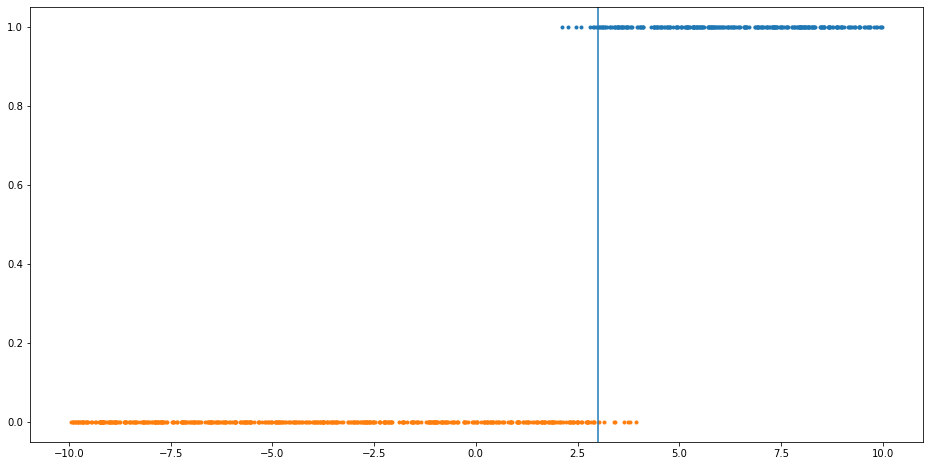

In [29]:
size = 800
noise_n = size//50

x = np.random.uniform(low=-10, high=10, size=size)
y_mask = (x > 3)

noise_mask = np.logical_and(x > 2, x < 4)
noise_indices = np.where(noise_mask)[0]
choose = np.random.choice(noise_indices, size=noise_n)
y_mask[choose] = ~y_mask[choose]


y = y_mask.astype(np.int32)

fig, axes = plt.subplots(figsize=(16,8))
axes.plot(x[y_mask], y[y_mask], '.')
axes.plot(x[~y_mask], y[~y_mask], '.')
axes.axvline(3)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [153]:
def train_model(x, y, model, n_iters, batch_size):
    
    loss = []

    for i in tqdm(range(n_iters)):
        batch_idx = np.random.randint(0, x.shape[0], size=batch_size)

        batch_x = x[batch_idx]
        batch_y = y[batch_idx]

        L = model.train(batch_x, batch_y)

        loss.append(L)
        if i == 2000:
            model.lr /= 100
    return loss

In [154]:
metrics = []
for _ in range(10):
    model = LogisticRegression(1, lr=1e-2)
    loss = train_model(x_train.reshape(-1, 1), y_train, model, 6000, 32)
#     plot_loss(np.array(loss), figsize=(16,8), final_mean=None)
    metrics.append(model.evaluate(x_test.reshape(-1, 1), y_test))
np.mean(metrics).round(3)

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

0.042

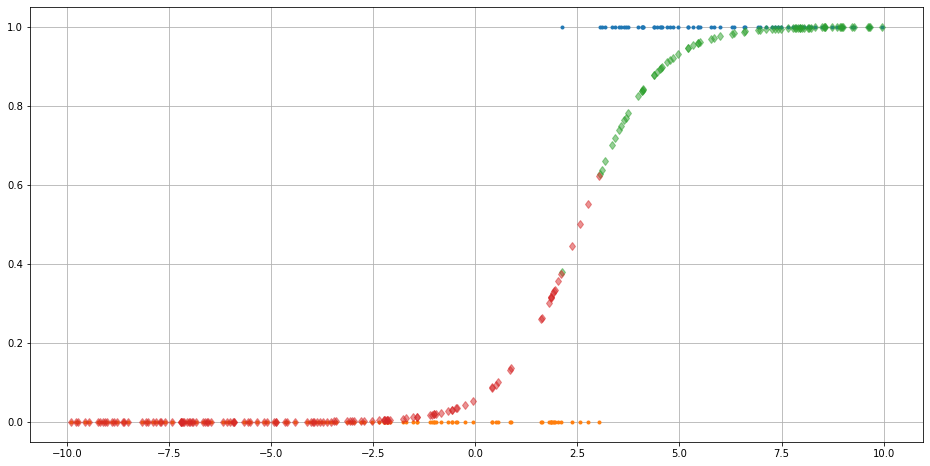

In [104]:
y_test_mask = y_test.astype(bool)

fig, axes = plt.subplots(figsize=(16,8))
axes.plot(x_test[y_test_mask], y_test[y_test_mask], '.')
axes.plot(x_test[~y_test_mask], y_test[~y_test_mask], '.')

y_predict = model.forward(x_test.reshape((-1,1))).squeeze()
axes.plot(x_test[y_test_mask], y_predict[y_test_mask], '.', alpha=0.5, marker='d')
axes.plot(x_test[~y_test_mask], y_predict[~y_test_mask], '.', alpha=0.5, marker='d')


axes.grid(which='both')
# axes.axvline(3)
# axes.axhline(0.5)

0.07644376568913704